# Telecom Churn Prediction
<br>
<font color = blue>
In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist,  task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data. 
</font>
</br>

<br>The solution is divided into the following sections:

- Data Understanding, Preparation, and Pre-Processing
- Exploratory Data Analysis 
- Feature Engineering and Variable Transformation
- Model Selection, Model Building, and  Prediction 

### 1.Data Understanding, Preparation, and Pre-Processing

Let's first have a look at the dataset and understand the size, attribute names etc.

In [4]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)

In [5]:
# reading the train dataset

df_train = pd.read_csv("train.csv")
df_train.shape

(69999, 172)

There are 69999 rows and 172 columns.

In [6]:
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

This shows that there are many null values present.

In [7]:
# reading the test dataset

df_test = pd.read_csv("test.csv")
df_test.shape

(30000, 171)

There are 30000 rows and 171 columns.

In [8]:
df_test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               28831 non-null  float64
 12   onnet_mou_7               28828 non-null  float64
 13   onnet_mou_8               28325 non-null  fl

We can see that no of columns in test data is 1 less than no of columns in train dataset. Lets find out which one is that.

In [9]:
df_train.columns.symmetric_difference(df_test.columns)

Index(['churn_probability'], dtype='object')

Since churn probability is missing from the test dataset, we cannot merge these two dataframes.
<br> Hence we will use train data here.

In [10]:
# let's look at the statistical aspects of the dataframe

df_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [11]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

We can see that there are :
- many fields related to date which are of data type object
- many fileds related to recharge
- few columns have month as number appended at the end, while few have name prefixed.
- there is a `id` and `circle_id` columns
- `churn_probability` is the target variable

### Data Cleaning

since we have some null values, let's now conduct some data cleaning steps. 

In [12]:
# duplicacy check

df_train["id"].is_unique

True

This means that no two Ids are same, hence we have all rows unique.

Lets now check if there is any column which has same value in all rows.

In [13]:
same_value_columns = []
for col in df_train.columns:
    if df_train[col].nunique() == 1:
        same_value_columns.append(col)
        
print(same_value_columns)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


Since these columns will not help in any model building, hence we can delete them.

In [14]:
df_train = df_train.drop( columns = same_value_columns)
df_train.shape

(69999, 159)

Now we have 159 columns.

Let us check the percentage of null values.

In [15]:
print(round(df_train.isnull().sum()/len(df_train.index)*100,2).sort_values(ascending=False))

arpu_3g_6                   74.90
night_pck_user_6            74.90
total_rech_data_6           74.90
max_rech_data_6             74.90
date_of_last_rech_data_6    74.90
count_rech_2g_6             74.90
av_rech_amt_data_6          74.90
fb_user_6                   74.90
count_rech_3g_6             74.90
arpu_2g_6                   74.90
total_rech_data_7           74.48
fb_user_7                   74.48
count_rech_2g_7             74.48
max_rech_data_7             74.48
count_rech_3g_7             74.48
av_rech_amt_data_7          74.48
arpu_2g_7                   74.48
night_pck_user_7            74.48
date_of_last_rech_data_7    74.48
arpu_3g_7                   74.48
total_rech_data_8           73.69
arpu_2g_8                   73.69
max_rech_data_8             73.69
count_rech_2g_8             73.69
count_rech_3g_8             73.69
av_rech_amt_data_8          73.69
night_pck_user_8            73.69
fb_user_8                   73.69
arpu_3g_8                   73.69
date_of_last_r

We can see there are many columns with more than 70% missing values. 

Lets find out the date type columns:

In [16]:
date_type_columns = df_train.dtypes[df_train.dtypes =='object'].index
print("Number of date_type_columns : " ,len(date_type_columns))
print("date_type_columns : ",date_type_columns)

Number of date_type_columns :  6
date_type_columns :  Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


Lets convert these to date time type.

In [17]:
for col in date_type_columns:
    df_train[col] = pd.to_datetime(df_train[col])

df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 159 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    id                        int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    onnet_mou_6               float64       
 5    onnet_mou_7               float64       
 6    onnet_mou_8               float64       
 7    offnet_mou_6              float64       
 8    offnet_mou_7              float64       
 9    offnet_mou_8              float64       
 10   roam_ic_mou_6             float64       
 11   roam_ic_mou_7             float64       
 12   roam_ic_mou_8             float64       
 13   roam_og_mou_6             float64       
 14   roam_og_mou_7             float64       
 15   roam_og_mou_8             float64       
 16   loc_og_t2t_mou_6          float64     

Deleting date columns as these are not required in our dataset.

In [18]:
df_train = df_train.drop(date_type_columns, axis=1)

Next lets seperate the recharge related columns and look into the data.

In [19]:
recharge_columns = df_train.columns[df_train.columns.str.contains('rech')]
print(recharge_columns)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')


Now we can find out the percentage of null values in these columns.

In [20]:
recharge_missing_values = round(df_train.loc[:,recharge_columns].isnull().sum()/len(df_train)*100,2)
print(pd.DataFrame(recharge_missing_values))

                        0
total_rech_num_6     0.00
total_rech_num_7     0.00
total_rech_num_8     0.00
total_rech_amt_6     0.00
total_rech_amt_7     0.00
total_rech_amt_8     0.00
max_rech_amt_6       0.00
max_rech_amt_7       0.00
max_rech_amt_8       0.00
total_rech_data_6   74.90
total_rech_data_7   74.48
total_rech_data_8   73.69
max_rech_data_6     74.90
max_rech_data_7     74.48
max_rech_data_8     73.69
count_rech_2g_6     74.90
count_rech_2g_7     74.48
count_rech_2g_8     73.69
count_rech_3g_6     74.90
count_rech_3g_7     74.48
count_rech_3g_8     73.69
av_rech_amt_data_6  74.90
av_rech_amt_data_7  74.48
av_rech_amt_data_8  73.69


Okay this shows the percentage of missing values. Next we can check the statistic of the same.

In [21]:
df_train.loc[:,recharge_columns].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,...,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,...,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,7.566522,7.706667,7.224932,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,2.467612,...,125.374925,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,192.831096,201.455940,196.815792
std,7.041452,7.050614,7.195597,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,2.794610,...,109.648799,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,190.623115,198.346141,192.280532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,1.000000,...,25.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,82.000000,92.000000,84.000000
50%,6.000000,6.000000,5.000000,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,1.000000,...,145.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000
75%,9.000000,10.000000,9.000000,438.000000,430.000000,436.000000,120.000000,128.000000,144.000000,3.000000,...,179.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000
max,170.000000,138.000000,138.000000,35190.000000,40335.000000,45320.000000,4010.000000,3299.000000,4449.000000,61.000000,...,1555.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,5920.000000,4365.000000,4076.000000


Here we can do 2 things :
- Impute missing values with 0 as it would denote that recharge amount for that month is 0.
- Derive new columns to find total recharge data, total recharge amount data, average recharge amount data

#### 1. Imputing NA with 0

In [22]:
df_train['total_rech_data_6'] = df_train['total_rech_data_6'].replace(np.NaN,0.0)
df_train['total_rech_data_7'] = df_train['total_rech_data_7'].replace(np.NaN,0.0)
df_train['total_rech_data_8'] = df_train['total_rech_data_8'].replace(np.NaN,0.0)

In [23]:
df_train['av_rech_amt_data_6'] = df_train['av_rech_amt_data_6'].replace(np.NaN,0.0)
df_train['av_rech_amt_data_7'] = df_train['av_rech_amt_data_7'].replace(np.NaN,0.0)
df_train['av_rech_amt_data_8'] = df_train['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [24]:
df_train['max_rech_data_6'] = df_train['max_rech_data_6'].replace(np.NaN,0.0)
df_train['max_rech_data_7'] = df_train['max_rech_data_7'].replace(np.NaN,0.0)
df_train['max_rech_data_8'] = df_train['max_rech_data_8'].replace(np.NaN,0.0)

In [25]:
df_train['count_rech_2g_6'] = df_train['count_rech_2g_6'].replace(np.NaN,0.0)
df_train['count_rech_2g_7'] = df_train['count_rech_2g_7'].replace(np.NaN,0.0)
df_train['count_rech_2g_8'] = df_train['count_rech_2g_8'].replace(np.NaN,0.0)

In [26]:
df_train['count_rech_3g_6'] = df_train['count_rech_3g_6'].replace(np.NaN,0.0)
df_train['count_rech_3g_7'] = df_train['count_rech_3g_7'].replace(np.NaN,0.0)
df_train['count_rech_3g_8'] = df_train['count_rech_3g_8'].replace(np.NaN,0.0)

#### 2. Deriving new columns

In [27]:
# total recharge amount data

df_train['total_rech_amt_data_6'] = df_train['av_rech_amt_data_6'] * df_train['total_rech_data_6']
df_train['total_rech_amt_data_7'] = df_train['av_rech_amt_data_7'] * df_train['total_rech_data_7']
df_train['total_rech_amt_data_8'] = df_train['av_rech_amt_data_8'] * df_train['total_rech_data_8']

In [28]:
# total average recharge amount for month 6 & 7 -> adding recharge amounts for data & calls for these 2 months and taking average

df_train['total_avg_rech_amt_6_7'] = (df_train['total_rech_amt_6'] + df_train['total_rech_amt_data_6'] + df_train['total_rech_amt_7'] + df_train['total_rech_amt_data_7'])/2

#### 3. Imputing categorical values

In [29]:
# lets check night_pck_user_ values 

df_train.night_pck_user_6.value_counts()

0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64

In [30]:
df_train.fb_user_6.value_counts()

1.0    16098
0.0     1470
Name: fb_user_6, dtype: int64

These both are categorical variables. Hence we can impute the NAs with another value like -1 

In [31]:
cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

df_train[cols] = df_train[cols].apply(lambda x: x.fillna(-1))

Lets find the null values percentage once again.

In [32]:
print(round(df_train.isnull().sum()/len(df_train.index)*100,2).sort_values(ascending=False))

arpu_3g_6                 74.90
arpu_2g_6                 74.90
arpu_3g_7                 74.48
arpu_2g_7                 74.48
arpu_3g_8                 73.69
arpu_2g_8                 73.69
std_ic_mou_8               5.29
spl_og_mou_8               5.29
loc_og_t2c_mou_8           5.29
loc_og_mou_8               5.29
spl_ic_mou_8               5.29
std_og_t2m_mou_8           5.29
std_og_t2f_mou_8           5.29
std_og_mou_8               5.29
isd_og_mou_8               5.29
og_others_8                5.29
std_ic_t2f_mou_8           5.29
loc_og_t2f_mou_8           5.29
std_ic_t2m_mou_8           5.29
loc_ic_t2t_mou_8           5.29
loc_ic_t2m_mou_8           5.29
std_ic_t2t_mou_8           5.29
loc_ic_t2f_mou_8           5.29
isd_ic_mou_8               5.29
std_og_t2t_mou_8           5.29
loc_ic_mou_8               5.29
loc_og_t2t_mou_8           5.29
roam_og_mou_8              5.29
ic_others_8                5.29
roam_ic_mou_8              5.29
offnet_mou_8               5.29
loc_og_t

Lets delete the columns with more than 70% missing values.

In [33]:
cols_70 = ['arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7', 'arpu_3g_8', 'arpu_2g_8']

df_train = df_train.drop(cols_70, axis=1)

In [34]:
df_train.shape

(69999, 151)

### Filter high value customers

##### hvc -> customers who have recharged their mobiles with more than or equal to 70th percentile amount

In [35]:
# finding hvc

hvc_cutoff = df_train['total_avg_rech_amt_6_7'].quantile(0.7)
print("HVC cutoff : ", hvc_cutoff)

HVC cutoff :  477.5


We will now filter the data from df_train with this value

In [36]:
df_train_hvc = df_train[df_train['total_avg_rech_amt_6_7'] >= hvc_cutoff]
df_train_hvc.shape

(21013, 151)

Lets find out the missing values percentage in the hvc data set.

In [37]:
print(round(df_train_hvc.isnull().sum()/len(df_train_hvc.index)*100,2).sort_values(ascending=False))

std_ic_t2f_mou_8          3.91
og_others_8               3.91
loc_og_t2c_mou_8          3.91
loc_og_mou_8              3.91
std_og_t2t_mou_8          3.91
std_og_t2m_mou_8          3.91
std_og_t2f_mou_8          3.91
std_og_mou_8              3.91
isd_og_mou_8              3.91
spl_og_mou_8              3.91
loc_ic_t2m_mou_8          3.91
loc_og_t2m_mou_8          3.91
loc_ic_t2f_mou_8          3.91
loc_ic_mou_8              3.91
std_ic_t2t_mou_8          3.91
std_ic_t2m_mou_8          3.91
std_ic_mou_8              3.91
spl_ic_mou_8              3.91
isd_ic_mou_8              3.91
ic_others_8               3.91
loc_og_t2f_mou_8          3.91
loc_ic_t2t_mou_8          3.91
offnet_mou_8              3.91
loc_og_t2t_mou_8          3.91
roam_ic_mou_8             3.91
onnet_mou_8               3.91
roam_og_mou_8             3.91
std_ic_t2t_mou_6          1.89
loc_ic_t2t_mou_6          1.89
offnet_mou_6              1.89
loc_ic_t2m_mou_6          1.89
loc_ic_mou_6              1.89
roam_ic_

Ok, so still we can see some missing data percentage. Let's use imputation to fill these cells.

In [38]:
# finding the numerical columns

num_cols = df_train_hvc.select_dtypes(include = ['int64', 'float64']).columns.tolist()
len(num_cols)

151

In [39]:
num_cols

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

We need to remove the churn probability from the list.

In [40]:
num_cols.remove('churn_probability')

In [41]:
print(len(num_cols))

150


In [42]:
num_cols

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

In [43]:
scalar = MinMaxScaler()

df_train_hvc[num_cols] =  scalar.fit_transform(df_train_hvc[num_cols])

knn = KNNImputer(n_neighbors=3)

df_train_hvc_knn = pd.DataFrame(knn.fit_transform(df_train_hvc[num_cols]))
df_train_hvc_knn.columns = df_train_hvc[num_cols].columns

print(df_train_hvc_knn.shape)
print(df_train_hvc_knn.isnull().sum().sum())

(21013, 150)
0


In [44]:
df_train_hvc[num_cols] = scalar.inverse_transform(df_train_hvc_knn)
print(df_train_hvc.shape)
print(df_train_hvc.isnull().sum().sum())

(21013, 151)
0


In [45]:
print(round(df_train_hvc.isnull().sum()/len(df_train_hvc.index)*100,2).sort_values(ascending=False))

id                        0.0
total_rech_amt_7          0.0
max_rech_amt_6            0.0
max_rech_amt_7            0.0
max_rech_amt_8            0.0
last_day_rch_amt_6        0.0
last_day_rch_amt_7        0.0
last_day_rch_amt_8        0.0
total_rech_data_6         0.0
total_rech_data_7         0.0
total_rech_data_8         0.0
max_rech_data_6           0.0
max_rech_data_7           0.0
max_rech_data_8           0.0
count_rech_2g_6           0.0
count_rech_2g_7           0.0
count_rech_2g_8           0.0
total_rech_amt_8          0.0
total_rech_amt_6          0.0
count_rech_3g_7           0.0
total_rech_num_8          0.0
std_ic_mou_8              0.0
total_ic_mou_6            0.0
total_ic_mou_7            0.0
total_ic_mou_8            0.0
spl_ic_mou_6              0.0
spl_ic_mou_7              0.0
spl_ic_mou_8              0.0
isd_ic_mou_6              0.0
isd_ic_mou_7              0.0
isd_ic_mou_8              0.0
ic_others_6               0.0
ic_others_7               0.0
ic_others_

### 2. Exploratory Data Analysis

Now we can see that our dataset is free from missing values.

In [46]:
df_train_hvc.churn_probability.value_counts()

0    19274
1     1739
Name: churn_probability, dtype: int64

In [47]:
df_train_hvc.churn_probability.value_counts()/df_train_hvc.shape[0]

0    0.917242
1    0.082758
Name: churn_probability, dtype: float64

We can see that around 8.27% customers have churned out in this dataset.

Lets start by doing a box plot for total recharge data of different months against churn probability.

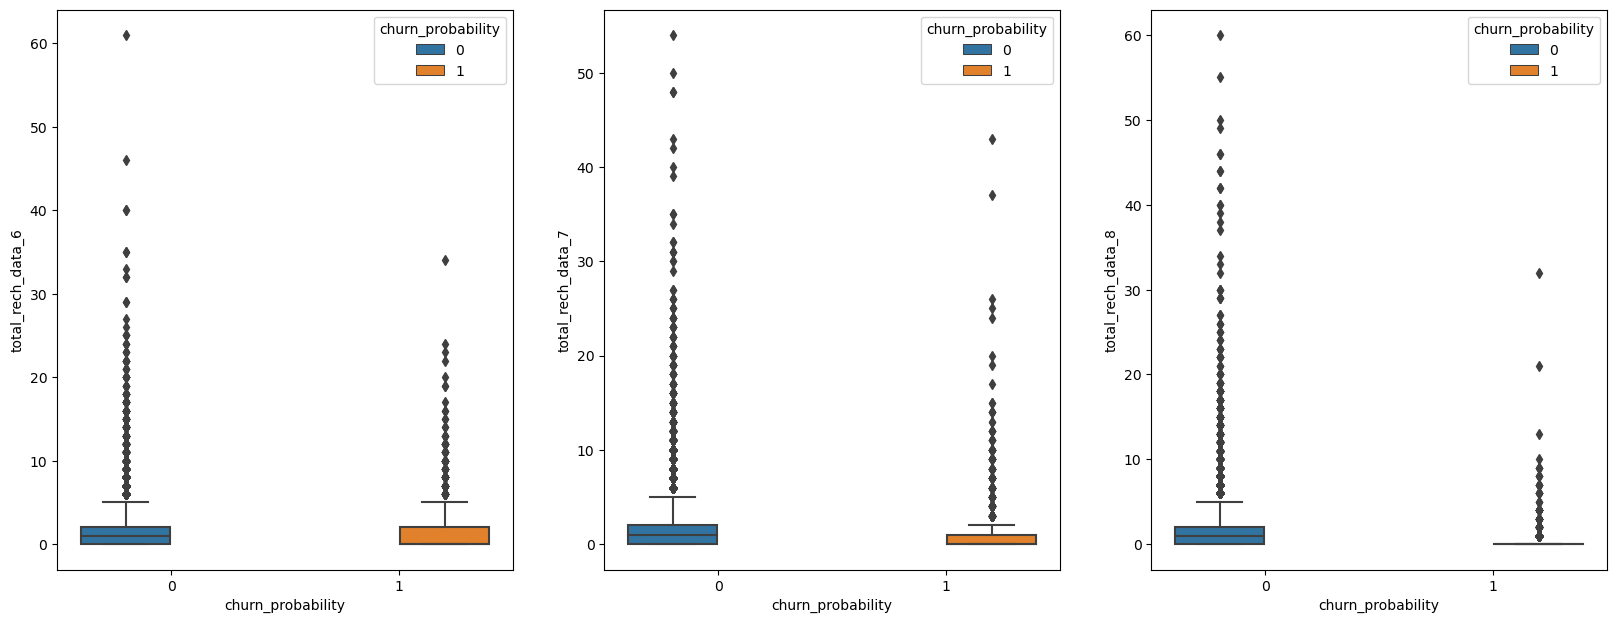

In [48]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df_train_hvc, y="total_rech_data_6", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,2)
sns.boxplot(data=df_train_hvc, y="total_rech_data_7", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,3)
sns.boxplot(data=df_train_hvc, y="total_rech_data_8", x="churn_probability", hue="churn_probability")
plt.show()

This shows that there are lots of outliers.

So first lets remove the outliers

In [49]:
def remove_outliers(col, k=3):
    upl = col.mean() + k*col.std()
    lpl = col.mean() - k*col.std()
    col[col<lpl] = lpl
    col[col>upl] = upl
    return col

In [50]:
df = df_train_hvc

df[num_cols] = df[num_cols].apply(remove_outliers, axis=0)

<Axes: xlabel='arpu_6', ylabel='Density'>

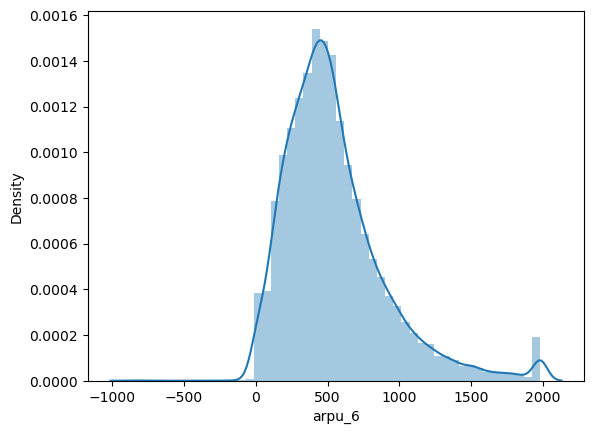

In [51]:
sns.distplot(df.arpu_6)

<Axes: xlabel='churn_probability', ylabel='count'>

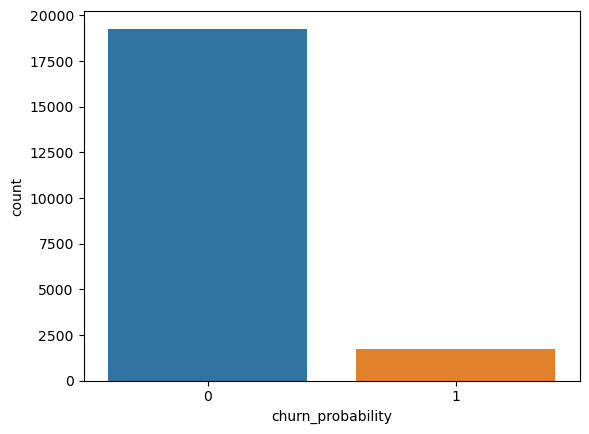

In [52]:
sns.countplot(data=df,x="churn_probability")

<Axes: xlabel='churn_probability', ylabel='aon'>

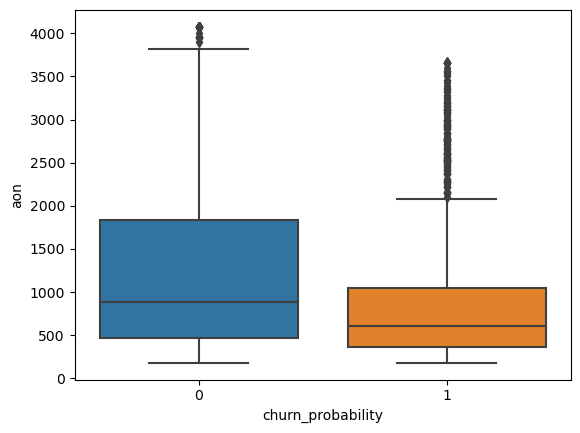

In [53]:
sns.boxplot(data=df, y="aon", x="churn_probability")

More churn happens when AON (age of network) is below 1000 i.e for less than 1000 days, churn probability is high.

<Axes: xlabel='onnet_mou_6', ylabel='Density'>

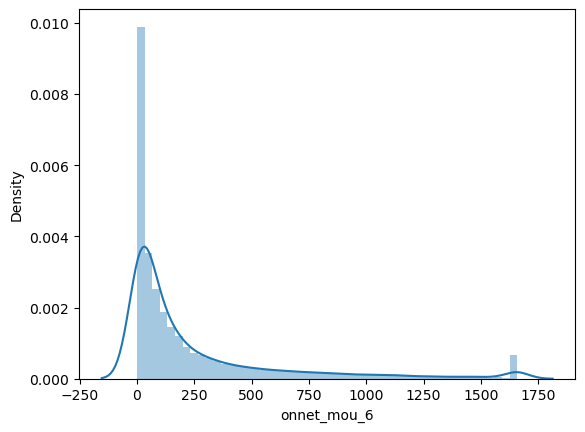

In [54]:
sns.distplot(df.onnet_mou_6)

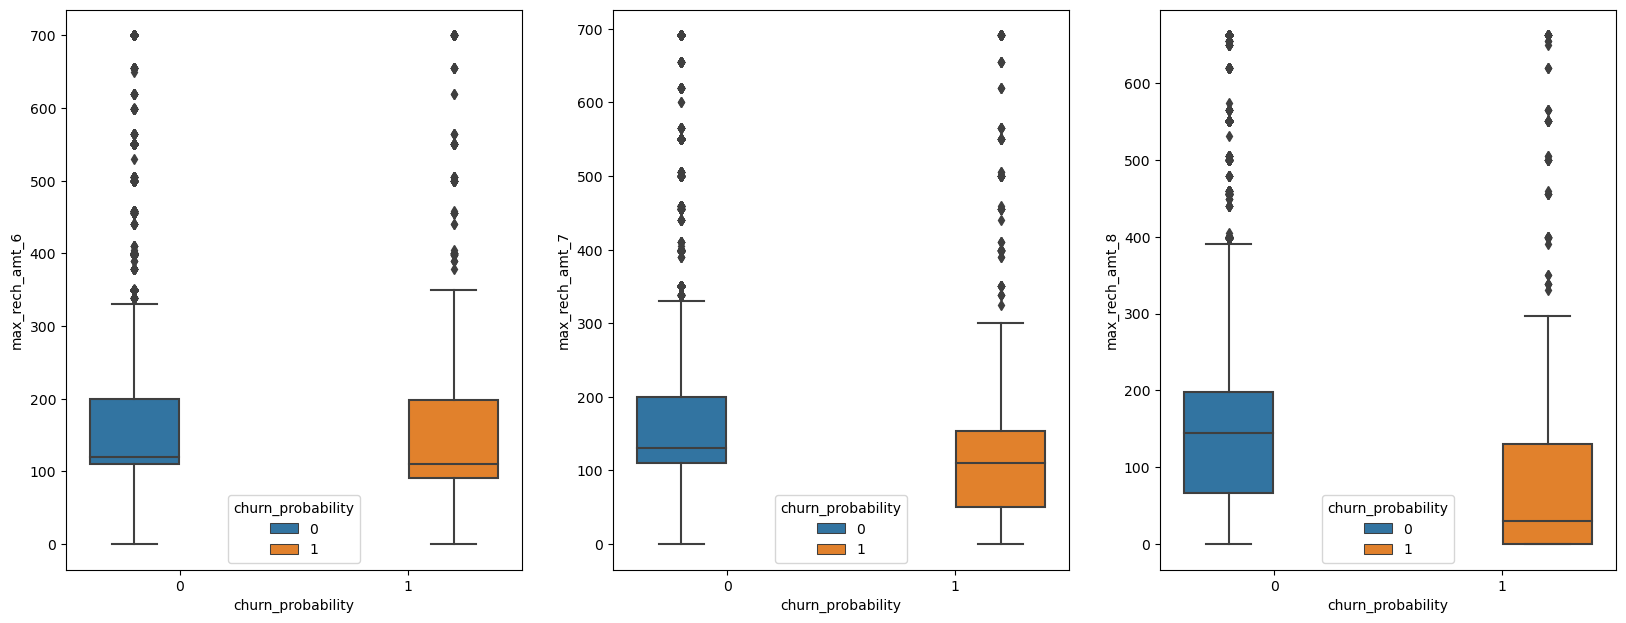

In [55]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df, y="max_rech_amt_6", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,2)
sns.boxplot(data=df, y="max_rech_amt_7", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,3)
sns.boxplot(data=df, y="max_rech_amt_8", x="churn_probability", hue="churn_probability")
plt.show()

Less recharge amount is tending towards churning.

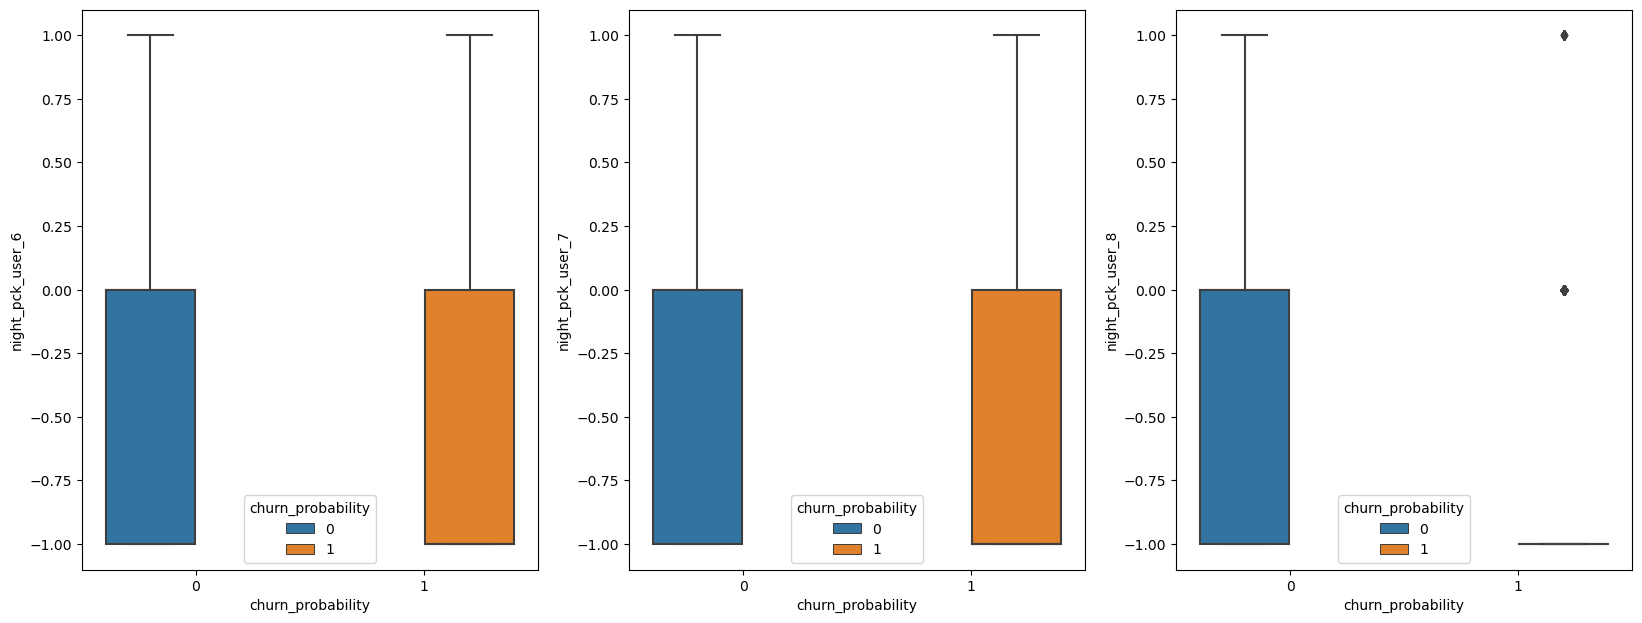

In [56]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df, y="night_pck_user_6", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,2)
sns.boxplot(data=df, y="night_pck_user_7", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,3)
sns.boxplot(data=df, y="night_pck_user_8", x="churn_probability", hue="churn_probability")
plt.show()

No direct insights from the night pack user data.

### Model Building

Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [57]:
# Putting feature variable to X
X = df.drop(['churn_probability','id'], axis=1)

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_6_7
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,1.0,1.0,647.0,0.0,0.00,0.00,1225.0,1337.0,852.0,1494.0
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,...,-1.0,1.0,602.0,0.0,0.00,0.00,154.0,0.0,154.0,604.0
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,...,-1.0,-1.0,455.0,0.0,0.00,0.00,0.0,0.0,0.0,1205.0
24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.00,...,0.0,0.0,1219.0,0.0,0.00,0.00,23.0,92.0,23.0,491.0
27,390.489,350.985,421.300,8.58,11.48,12.68,133.16,158.73,182.83,0.00,...,1.0,1.0,573.0,700.4,185.71,173.72,820.0,608.0,642.0,1282.5


In [58]:
# Putting response variable to y
y = df['churn_probability']

y.head()

4     0
15    0
23    0
24    0
27    0
Name: churn_probability, dtype: int64

In [59]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Since we have only 8.27% data as churned one, its an imbalanced dataset and to balance that we will use SMOTE.

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [61]:
X_train_sm.shape

(27020, 149)

In [62]:
 y_train_sm.shape

(27020,)

In [63]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM( y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26870
Model Family:                Binomial   Df Model:                          149
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9255.7
Date:                Wed, 10 Jan 2024   Deviance:                       18511.
Time:                        12:03:50   Pearson chi2:                 6.46e+09
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5040
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.8373      0.146      5.719      0.000       0.550       1.124
arpu_6                     0.0005      0.000      2.173      0.030    4.91e-05       0.001
arpu_7                     0.0014      0.000      5.791      0.000       0.001       0.002
arpu_8                     0.0015      0.000      6.189      0.000       0.001       0.002
onnet_mou_6               -0.0003      0.000     -0.837      0.403      -0.001       0.000
onnet_mou_7                0.0016      0.000      3.207      0.001       0.001       0.003
onnet_mou_8                0.0002      0.001      0.305      0.761      -0.001       0.001
offnet_mou_6               0.0009      0.000      2.735      0.006       0.000       0.002
offnet_mou_7            3.813e-05      0.000      0.081      0.935      -0.001       0.001
offnet_mou_8              -0.0021      0.000     -4.634      0.000      -0.003      -0.001
roam_ic_mou_6              0.0015      0.001      1.511      0.131      -0.000       0.003
roam_ic_mou_7              0.0061      0.001      5.458      0.000       0.004       0.008
roam_ic_mou_8             -0.0041      0.001     -3.926      0.000      -0.006      -0.002
roam_og_mou_6              0.0003      0.001      0.416      0.678      -0.001       0.002
roam_og_mou_7             -0.0023      0.001     -2.837      0.005      -0.004      -0.001
roam_og_mou_8              0.0071      0.001      9.039      0.000       0.006       0.009
loc_og_t2t_mou_6           0.0020      0.001      2.049      0.040     8.8e-05       0.004
loc_og_t2t_mou_7           0.0004      0.001      0.376      0.707      -0.002       0.003
loc_og_t2t_mou_8          -0.0088      0.001     -6.192      0.000      -0.012      -0.006
loc_og_t2m_mou_6          -0.0009      0.001     -0.936      0.349      -0.003       0.001
loc_og_t2m_mou_7           0.0013      0.001      1.145      0.252      -0.001       0.003
loc_og_t2m_mou_8          -0.0044      0.001     -3.626      0.000      -0.007      -0.002
loc_og_t2f_mou_6          -0.0114      0.004     -2.927      0.003      -0.019      -0.004
loc_og_t2f_mou_7          -0.0013      0.004     -0.294      0.769      -0.010       0.007
loc_og_t2f_mou_8           0.0122      0.004      2.899      0.004       0.004       0.020
loc_og_t2c_mou_6          -0.0407      0.007     -5.711      0.000      -0.055      -0.027
loc_og_t2c_mou_7          -0.0077      0.006     -1.218      0.223      -0.020       0.005
loc_og_t2c_mou_8           0.0391      0.007      5.440      0.000       0.025       0.053
loc_og_mou_6              -0.0003      0.001     -0.358      0.720      -0.002       0.002
loc_og_mou_7              -0.0015      0.001     -1.288      0.198      -0.004       0.001
loc_og_mou_8               0.0126      0.001      9.781      0.000       0.010  

### Feature Selection Using RFE

In [64]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

rfe = RFE(logreg,  n_features_to_select=15)            
rfe = rfe.fit(X_train_sm, y_train_sm)

In [65]:
# rfe.support_

In [66]:
print("selected columns: ",X_train_sm.columns[rfe.support_])

selected columns:  Index(['loc_og_t2c_mou_6', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_8',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_data_8', 'night_pck_user_8',
       'fb_user_8'],
      dtype='object')


In [67]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 75),
 ('arpu_7', False, 25),
 ('arpu_8', False, 57),
 ('onnet_mou_6', False, 67),
 ('onnet_mou_7', False, 59),
 ('onnet_mou_8', False, 74),
 ('offnet_mou_6', False, 77),
 ('offnet_mou_7', False, 93),
 ('offnet_mou_8', False, 45),
 ('roam_ic_mou_6', False, 47),
 ('roam_ic_mou_7', False, 11),
 ('roam_ic_mou_8', False, 35),
 ('roam_og_mou_6', False, 43),
 ('roam_og_mou_7', False, 88),
 ('roam_og_mou_8', False, 10),
 ('loc_og_t2t_mou_6', False, 54),
 ('loc_og_t2t_mou_7', False, 58),
 ('loc_og_t2t_mou_8', False, 23),
 ('loc_og_t2m_mou_6', False, 72),
 ('loc_og_t2m_mou_7', False, 129),
 ('loc_og_t2m_mou_8', False, 26),
 ('loc_og_t2f_mou_6', False, 8),
 ('loc_og_t2f_mou_7', False, 94),
 ('loc_og_t2f_mou_8', False, 7),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', False, 46),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_6', False, 117),
 ('loc_og_mou_7', False, 91),
 ('loc_og_mou_8', False, 22),
 ('std_og_t2t_mou_6', False, 66),
 ('std_og_t2t_mou_7', False, 60),
 ('

In [68]:
col = X_train_sm.columns[rfe.support_]

#### Assessing the model with StatsModels

In [69]:
X_train_SM=sm.add_constant(X_train_sm[col])
logm2 = sm.GLM( y_train_sm, X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    27004
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11013.
Date:                Wed, 10 Jan 2024   Deviance:                       22025.
Time:                        12:05:40   Pearson chi2:                 4.63e+09
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4351
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.9777      0.073     13.348      0.000       0.834       1.121
loc_og_t2c_mou_6     -0.0248      0.005     -4.858      0.000      -0.035      -0.015
loc_og_t2c_mou_8      0.0193      0.005      3.821      0.000       0.009       0.029
std_og_t2f_mou_8     -0.0470      0.007     -6.899      0.000      -0.060      -0.034
loc_ic_t2f_mou_7      0.0051      0.001      5.443      0.000       0.003       0.007
loc_ic_mou_8          0.0157      0.001     19.183      0.000       0.014       0.017
std_ic_mou_8          0.0201      0.001     21.986      0.000       0.018       0.022
total_ic_mou_8       -0.0237      0.001    -29.447      0.000      -0.025      -0.022
isd_ic_mou_8          0.0275      0.001     22.234      0.000       0.025       0.030
ic_others_8           0.0296      0.006      4.982      0.000       0.018       0.041
total_rech_num_6      0.0233      0.003      8.343      0.000       0.018       0.029
total_rech_num_7      0.0749      0.004     21.372      0.000       0.068       0.082
total_rech_num_8     -0.1325      0.004    -31.974      0.000      -0.141      -0.124
total_rech_data_8    -0.1085      0.015     -7.233      0.000      -0.138      -0.079
night_pck_user_8      1.1729      0.123      9.571      0.000       0.933       1.413
fb_user_8            -1.2122      0.067    -18.128      0.000      -1.343      -1.081
=====================================================================================
"""

In [70]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred[:10]

0    0.949240
1    0.098897
2    0.501237
3    0.076720
4    0.046937
5    0.096989
6    0.019117
7    0.405346
8    0.484679
9    0.335504
dtype: float64

In [71]:
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.94923995, 0.09889741, 0.50123735, 0.07671999, 0.04693734,
       0.09698899, 0.01911732, 0.40534626, 0.48467905, 0.33550401])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [72]:
y_train_sm_pred_final = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_Prob':y_train_sm_pred})
y_train_sm_pred_final['id'] = y_train_sm.index
y_train_sm_pred_final.head()

,Churn,Churn_Prob,id
0,0,0.949240,0
1,0,0.098897,1
2,0,0.501237,2
3,0,0.076720,3
4,0,0.046937,4


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [73]:
y_train_sm_pred_final['predicted'] = y_train_sm_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_sm_pred_final.head()

,Churn,Churn_Prob,id,predicted
0,0,0.949240,0,1
1,0,0.098897,1,0
2,0,0.501237,2,1
3,0,0.076720,3,0
4,0,0.046937,4,0


In [74]:
# Confusion matrix 

from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.predicted )
print(confusion)

[[11051  2459]
 [ 2163 11347]]


In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.predicted))

0.8289415247964471


Accuracy is ~82%

#### Checking VIFs

In [76]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_ic_mou_8,20.00
4,loc_ic_mou_8,15.52
13,night_pck_user_8,9.87
14,fb_user_8,7.02
10,total_rech_num_7,6.73
9,total_rech_num_6,5.13
11,total_rech_num_8,4.84
5,std_ic_mou_8,2.73
12,total_rech_data_8,2.36
3,loc_ic_t2f_mou_7,1.48


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.
With respect to z scores, lets delete 'total_ic_mou_8'.

In [78]:
col = col.drop('total_ic_mou_8', 1)
col

Index(['loc_og_t2c_mou_6', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_8',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_data_8', 'night_pck_user_8',
       'fb_user_8'],
      dtype='object')

In [79]:
X_train_SM=sm.add_constant(X_train_sm[col])
logm3 = sm.GLM( y_train_sm, X_train_SM, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    27005
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12048.
Date:                Wed, 10 Jan 2024   Deviance:                       24097.
Time:                        12:05:41   Pearson chi2:                 3.42e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3901
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2316      0.072     17.110      0.000       1.091       1.373
loc_og_t2c_mou_6     -0.0234      0.005     -4.730      0.000      -0.033      -0.014
loc_og_t2c_mou_8      0.0223      0.005      4.473      0.000       0.013       0.032
std_og_t2f_mou_8     -0.0397      0.006     -7.010      0.000      -0.051      -0.029
loc_ic_t2f_mou_7      0.0038      0.001      4.590      0.000       0.002       0.005
loc_ic_mou_8         -0.0064      0.000    -39.817      0.000      -0.007      -0.006
std_ic_mou_8         -0.0042      0.000    -11.503      0.000      -0.005      -0.003
isd_ic_mou_8         -0.0008      0.001     -1.065      0.287      -0.002       0.001
ic_others_8          -0.0005      0.005     -0.095      0.924      -0.011       0.010
total_rech_num_6      0.0373      0.003     13.699      0.000       0.032       0.043
total_rech_num_7      0.0682      0.003     19.865      0.000       0.061       0.075
total_rech_num_8     -0.1756      0.004    -42.637      0.000      -0.184      -0.168
total_rech_data_8    -0.0869      0.015     -5.789      0.000      -0.116      -0.057
night_pck_user_8      0.9742      0.122      7.979      0.000       0.735       1.213
fb_user_8            -1.2186      0.066    -18.427      0.000      -1.348      -1.089
=====================================================================================
"""

In [80]:
y_train_sm_pred = res.predict(X_train_SM).values.reshape(-1)
y_train_sm_pred[:10]

array([0.66571761, 0.10119558, 0.33742122, 0.10638543, 0.02693824,
       0.12295574, 0.05736376, 0.49429623, 0.5256331 , 0.51114192])

In [81]:
y_train_sm_pred_final['Churn_Prob'] = y_train_sm_pred

In [82]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_sm_pred_final['predicted'] = y_train_sm_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_sm_pred_final.head()

,Churn,Churn_Prob,id,predicted
0,0,0.665718,0,1
1,0,0.101196,1,0
2,0,0.337421,2,0
3,0,0.106385,3,0
4,0,0.026938,4,0


In [83]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.predicted))

0.8030717986676535


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,night_pck_user_8,9.72
13,fb_user_8,7.02
9,total_rech_num_7,6.73
8,total_rech_num_6,5.08
10,total_rech_num_8,4.72
11,total_rech_data_8,2.35
4,loc_ic_mou_8,2.09
3,loc_ic_t2f_mou_7,1.48
5,std_ic_mou_8,1.35
0,loc_og_t2c_mou_6,1.22


With respect to z scores, lets delete 'night_pck_user_8'.

In [85]:
col = col.drop('night_pck_user_8', 1)
col

Index(['loc_og_t2c_mou_6', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_8',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_data_8', 'fb_user_8'],
      dtype='object')

In [86]:
X_train_SM=sm.add_constant(X_train_sm[col])
logm4 = sm.GLM( y_train_sm, X_train_SM, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    27006
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12080.
Date:                Wed, 10 Jan 2024   Deviance:                       24160.
Time:                        12:05:42   Pearson chi2:                 3.38e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3887
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7460      0.038     19.872      0.000       0.672       0.820
loc_og_t2c_mou_6     -0.0228      0.005     -4.598      0.000      -0.032      -0.013
loc_og_t2c_mou_8      0.0235      0.005      4.731      0.000       0.014       0.033
std_og_t2f_mou_8     -0.0402      0.006     -7.079      0.000      -0.051      -0.029
loc_ic_t2f_mou_7      0.0038      0.001      4.562      0.000       0.002       0.005
loc_ic_mou_8         -0.0064      0.000    -39.852      0.000      -0.007      -0.006
std_ic_mou_8         -0.0041      0.000    -11.323      0.000      -0.005      -0.003
isd_ic_mou_8         -0.0010      0.001     -1.266      0.205      -0.002       0.001
ic_others_8           0.0010      0.005      0.187      0.851      -0.009       0.011
total_rech_num_6      0.0376      0.003     13.805      0.000       0.032       0.043
total_rech_num_7      0.0690      0.003     20.111      0.000       0.062       0.076
total_rech_num_8     -0.1751      0.004    -42.592      0.000      -0.183      -0.167
total_rech_data_8    -0.0690      0.014     -4.787      0.000      -0.097      -0.041
fb_user_8            -0.7308      0.025    -28.780      0.000      -0.781      -0.681
=====================================================================================
"""

In [87]:
y_train_sm_pred = res.predict(X_train_SM).values.reshape(-1)
y_train_sm_pred[:10]

array([0.66879894, 0.07050537, 0.34335961, 0.11322217, 0.02974952,
       0.14548403, 0.05957484, 0.50730249, 0.41886232, 0.51462325])

In [88]:
y_train_sm_pred_final['Churn_Prob'] = y_train_sm_pred

In [89]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_sm_pred_final['predicted'] = y_train_sm_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_sm_pred_final.head()

,Churn,Churn_Prob,id,predicted
0,0,0.668799,0,1
1,0,0.070505,1,0
2,0,0.343360,2,0
3,0,0.113222,3,0
4,0,0.029750,4,0


In [90]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.predicted))

0.8018504811250925


So overall the accuracy is same.

##### Let's check the VIFs again

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_rech_num_7,6.48
10,total_rech_num_8,4.68
8,total_rech_num_6,4.58
11,total_rech_data_8,2.24
4,loc_ic_mou_8,1.98
12,fb_user_8,1.93
3,loc_ic_t2f_mou_7,1.47
5,std_ic_mou_8,1.34
0,loc_og_t2c_mou_6,1.22
1,loc_og_t2c_mou_8,1.22


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [92]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.predicted )
confusion

array([[10615,  2895],
       [ 2459, 11051]], dtype=int64)

In [93]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.predicted)

0.8018504811250925

#### Metrics beyond simply accuracy

In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8179866765358993

In [96]:
# Let us calculate specificity
TN / float(TN+FP)

0.7857142857142857

In [97]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21428571428571427


In [98]:
# positive predictive value 
print (TP / float(TP+FP))

0.7924135952961423


In [99]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8119167813981949


### Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [100]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [101]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_Prob, drop_intermediate = False )

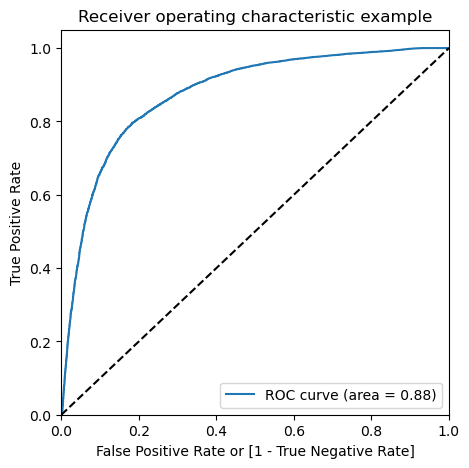

In [102]:
draw_roc(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_Prob)

####  Finding Optimal Cutoff Point¶

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [103]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Churn,Churn_Prob,id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.668799,0,1,1,1,1,1,1,1,1,0,0,0
1,0,0.070505,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.343360,2,0,1,1,1,1,0,0,0,0,0,0
3,0,0.113222,3,0,1,1,0,0,0,0,0,0,0,0
4,0,0.029750,4,0,1,0,0,0,0,0,0,0,0,0


In [104]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.652628  0.977498  0.327757
0.2   0.2  0.720836  0.955588  0.486084
0.3   0.3  0.762028  0.922132  0.601925
0.4   0.4  0.789082  0.876240  0.701925
0.5   0.5  0.801850  0.817987  0.785714
0.6   0.6  0.803997  0.761732  0.846262
0.7   0.7  0.782642  0.669504  0.895781
0.8   0.8  0.713916  0.480977  0.946854
0.9   0.9  0.577498  0.169430  0.985566


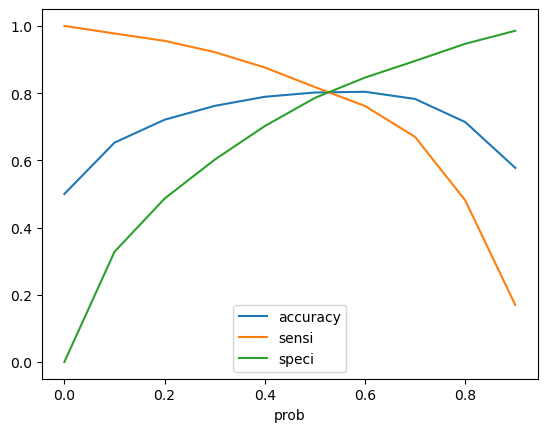

In [105]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [106]:
y_train_sm_pred_final['final_predicted'] = y_train_sm_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_sm_pred_final.head()

,Churn,Churn_Prob,id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.668799,0,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.070505,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.343360,2,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.113222,3,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.029750,4,0,1,0,0,0,0,0,0,0,0,0,0


In [107]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.final_predicted)

0.8018504811250925

Since we had already taken 0.5 as the cut off value, confusion matrix will remain same.

### Precision and Recall

##### Precision
TP / TP + FP

In [108]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7924135952961423

##### Recall
TP / TP + FN

In [109]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8179866765358993

### Making predictions on the test set

In [110]:
X_test = X_test[col]
X_test.head()

,loc_og_t2c_mou_6,loc_og_t2c_mou_8,std_og_t2f_mou_8,loc_ic_t2f_mou_7,loc_ic_mou_8,std_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_data_8,fb_user_8
5662,0.0,0.0,0.0,0.41,60.54,2.73,0.01,0.38,6.0,8.0,7.000000,0.0,-1.0
37574,1.8,0.0,0.0,0.00,53.63,96.86,0.00,0.00,19.0,20.0,14.000000,0.0,-1.0
58341,0.0,0.0,0.0,0.86,77.56,3.09,0.00,0.00,33.0,35.0,37.610071,0.0,-1.0
23282,0.0,0.0,0.0,6.94,386.03,221.19,44.14,0.00,11.0,8.0,8.000000,3.0,0.0
30561,0.0,0.0,0.0,0.43,18.39,58.18,0.78,0.00,9.0,10.0,9.000000,0.0,-1.0


In [111]:
X_test_sm = sm.add_constant(X_test)

In [112]:
y_test_pred = res.predict(X_test_sm)

In [113]:
y_test_pred[:10]

5662     0.652567
37574    0.582877
58341    0.123303
23282    0.035423
30561    0.639253
45844    0.535581
30159    0.679531
62778    0.549908
45559    0.088801
35274    0.810912
dtype: float64

In [114]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [115]:
# Let's see the head
y_pred_1.head()

,0
5662,0.652567
37574,0.582877
58341,0.123303
23282,0.035423
30561,0.639253


In [116]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [117]:
# Putting CustID to index
y_test_df['id'] = y_test_df.index


In [118]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [119]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [120]:
y_pred_final.head()

,churn_probability,id,0
0,0,5662,0.652567
1,0,37574,0.582877
2,0,58341,0.123303
3,0,23282,0.035423
4,0,30561,0.639253


In [121]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob', 'churn_probability':'Churn'})

In [122]:
# Rearranging the columns
y_pred_final = y_pred_final[['id','Churn','Churn_Prob']]

In [123]:
# Let's see the head of y_pred_final
y_pred_final.head()

,id,Churn,Churn_Prob
0,5662,0,0.652567
1,37574,0,0.582877
2,58341,0,0.123303
3,23282,0,0.035423
4,30561,0,0.639253


In [124]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [125]:
y_pred_final.head()

,id,Churn,Churn_Prob,final_predicted
0,5662,0,0.652567,1
1,37574,0,0.582877,1
2,58341,0,0.123303,0
3,23282,0,0.035423,0
4,30561,0,0.639253,1


In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7769670050761421

In [127]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[4490, 1274],
       [ 132,  408]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7555555555555555

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.778972935461485

### Using Decision Trees

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [132]:
X_train.shape, X_test.shape

((14709, 149), (6304, 149))

In [133]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [134]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [135]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [136]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5764
           1       0.74      0.49      0.59       540

    accuracy                           0.94      6304
   macro avg       0.85      0.74      0.78      6304
weighted avg       0.94      0.94      0.94      6304



#### Plot the ROC curve

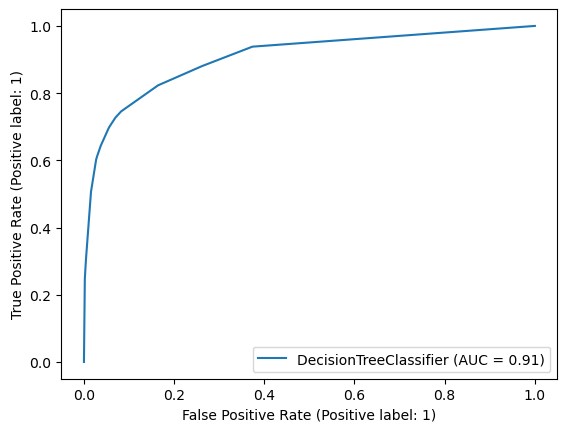

In [137]:
RocCurveDisplay.from_estimator(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [138]:
dt = DecisionTreeClassifier(random_state=42)

In [139]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [140]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [141]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 2.45 s
Wall time: 1min 45s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [142]:
grid_search.best_score_

0.943639684129096

In [143]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

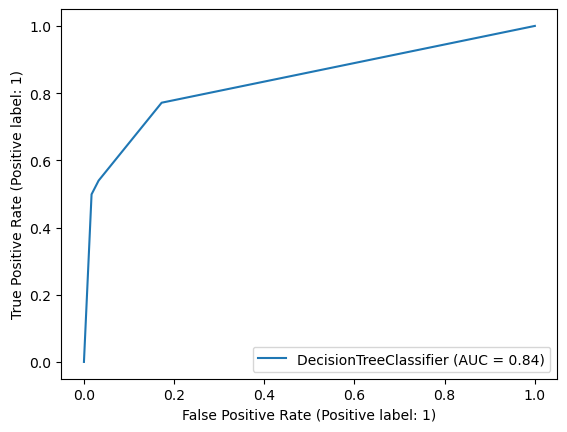

In [144]:
RocCurveDisplay.from_estimator(dt_best, X_train, y_train)
plt.show()

### Using Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [147]:
%%time
rf.fit(X_train, y_train)

CPU times: total: 281 ms
Wall time: 646 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [148]:
rf.oob_score_

0.9203888775579577

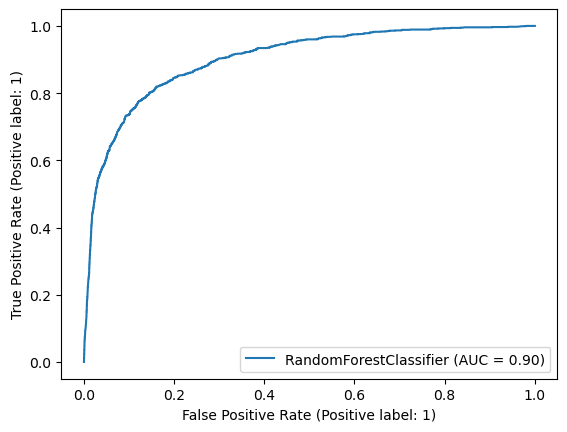

In [149]:
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [150]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [151]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [152]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [153]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: total: 19.6 s
Wall time: 12min 11s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [154]:
grid_search.best_score_

0.9427558668637088

In [155]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=25,
                       n_jobs=-1, random_state=42)

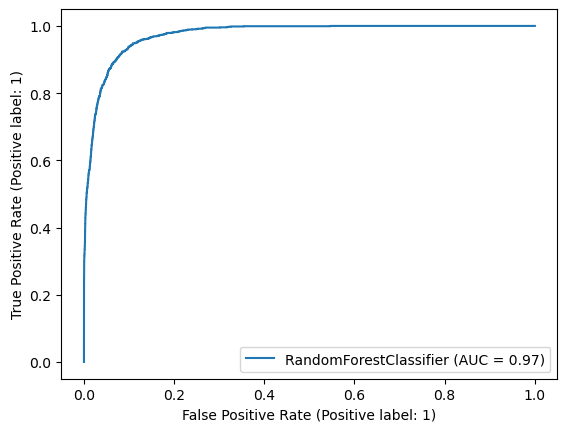

In [156]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

In [157]:
rf_best.feature_importances_

array([4.96306777e-03, 8.92902167e-03, 6.07663696e-02, 3.29621042e-03,
       6.72956025e-03, 1.12745913e-02, 4.11565384e-03, 4.72862922e-03,
       5.95622892e-03, 1.67281316e-03, 2.47897221e-03, 3.52997248e-02,
       1.22196811e-03, 8.19427886e-03, 4.03441980e-02, 3.48033222e-03,
       2.49497431e-03, 1.18198741e-02, 2.97056533e-03, 5.77188539e-03,
       1.11217725e-02, 2.07969370e-03, 1.17551707e-03, 3.64794167e-03,
       4.44021304e-04, 1.44320382e-03, 1.51808900e-03, 3.62021868e-03,
       5.63929163e-03, 1.77563167e-02, 2.67247300e-03, 4.30783582e-03,
       3.65159965e-03, 4.49317578e-03, 5.37724539e-03, 5.04169199e-03,
       1.87489120e-04, 1.54271721e-04, 1.74567274e-05, 5.07647669e-03,
       3.29426823e-03, 8.61257989e-03, 1.07304570e-04, 4.87813822e-04,
       1.95760396e-04, 1.77440517e-03, 2.16303102e-03, 3.27963492e-03,
       1.50413302e-03, 0.00000000e+00, 0.00000000e+00, 6.30527599e-03,
       5.20606928e-03, 3.88083928e-02, 4.90083194e-03, 5.59581979e-03,
      

In [158]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [159]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
80,total_ic_mou_8,0.147866
2,arpu_8,0.060766
101,last_day_rch_amt_8,0.056337
95,total_rech_amt_8,0.048508
98,max_rech_amt_8,0.045223
14,roam_og_mou_8,0.040344
53,total_og_mou_8,0.038808
11,roam_ic_mou_8,0.035300
92,total_rech_num_8,0.033319
116,av_rech_amt_data_8,0.023331


imp_df.sort_values

In [160]:
imp_df.sort_values

<bound method DataFrame.sort_values of                     Varname       Imp
0                    arpu_6  0.004963
1                    arpu_7  0.008929
2                    arpu_8  0.060766
3               onnet_mou_6  0.003296
4               onnet_mou_7  0.006730
5               onnet_mou_8  0.011275
6              offnet_mou_6  0.004116
7              offnet_mou_7  0.004729
8              offnet_mou_8  0.005956
9             roam_ic_mou_6  0.001673
10            roam_ic_mou_7  0.002479
11            roam_ic_mou_8  0.035300
12            roam_og_mou_6  0.001222
13            roam_og_mou_7  0.008194
14            roam_og_mou_8  0.040344
15         loc_og_t2t_mou_6  0.003480
16         loc_og_t2t_mou_7  0.002495
17         loc_og_t2t_mou_8  0.011820
18         loc_og_t2m_mou_6  0.002971
19         loc_og_t2m_mou_7  0.005772
20         loc_og_t2m_mou_8  0.011122
21         loc_og_t2f_mou_6  0.002080
22         loc_og_t2f_mou_7  0.001176
23         loc_og_t2f_mou_8  0.003648
24         

##  Model with PCA

In [161]:
#Import PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [162]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [163]:
pca.components_
variance_cumu = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative Variance')

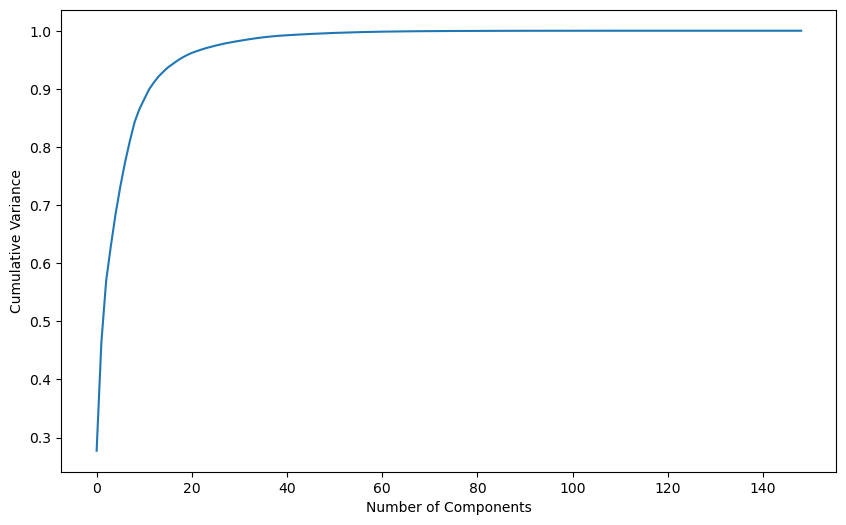

In [164]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

From above plot looks 60 components are explained with 90% variance, hence will do PCA with 20 components

In [174]:
# Start PCA with 60
pca_final = IncrementalPCA(n_components=50)

In [181]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train_sm)

Applying transformation on the test set

We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [182]:
X_test_pca = pca_final.transform(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- const
Feature names seen at fit time, yet now missing:
- aon
- arpu_6
- arpu_7
- arpu_8
- aug_vbc_3g
- ...


# Logistic regression with PCA

In [169]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [170]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [183]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train_sm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [184]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.382505,0.009120,0.010961,0.004232,0.01,{'C': 0.01},0.882769,0.886081,0.881661,0.882847,...,0.884318,0.002452,2,0.886446,0.882862,0.885532,0.885144,0.883230,0.884643,0.001375
1,0.352577,0.023819,0.007077,0.005700,0.1,{'C': 0.1},0.882769,0.886081,0.882029,0.882847,...,0.884392,0.002375,1,0.886446,0.882586,0.885253,0.884958,0.883415,0.884532,0.001371
2,0.339257,0.040284,0.004605,0.002641,1,{'C': 1},0.882769,0.885704,0.881661,0.882847,...,0.884169,0.002281,5,0.886630,0.882494,0.885253,0.884773,0.883415,0.884513,0.001441
3,0.391446,0.009892,0.008553,0.005909,10,{'C': 10},0.882769,0.885704,0.881661,0.882847,...,0.884243,0.002402,3,0.886630,0.882586,0.885253,0.885051,0.883508,0.884606,0.001414
4,0.383720,0.005003,0.002267,0.003703,100,{'C': 100},0.882769,0.885704,0.881661,0.882847,...,0.884243,0.002402,3,0.886446,0.882494,0.885253,0.885051,0.883415,0.884532,0.001404
5,0.360463,0.015956,0.004084,0.006060,1000,{'C': 1000},0.882769,0.885704,0.881661,0.882847,...,0.884169,0.002281,5,0.886538,0.882586,0.885161,0.884958,0.883323,0.884513,0.001404


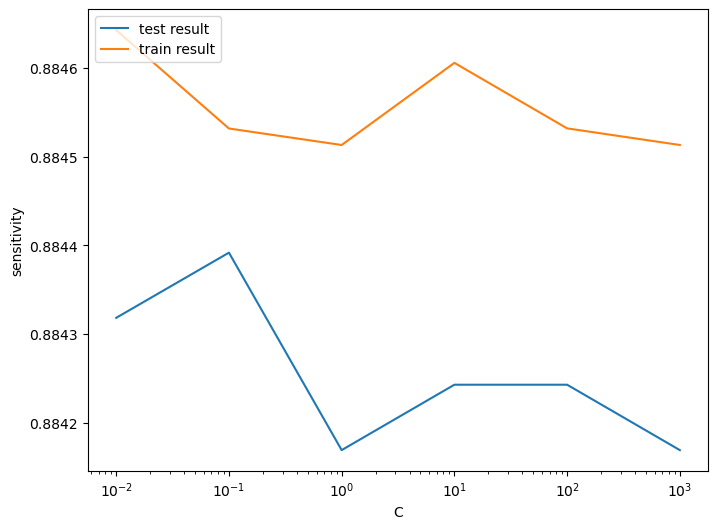

In [185]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [186]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.884391623411663 at C = 0.1
